In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data90.csv')

In [3]:
df.head(5)

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,avg_payment_span_0_12m,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours,default,merchant_category_Automotive Parts & Accessories,merchant_category_Bags & Wallets,merchant_category_Body & Hair Care,merchant_category_Books & Magazines,merchant_category_Car electronics,merchant_category_Children Clothes & Nurturing products,merchant_category_Children toys,merchant_category_Cleaning & Sanitary,merchant_category_Collectibles,merchant_category_Concept stores & Miscellaneous,merchant_category_Cosmetics,merchant_category_Costumes & Party supplies,merchant_category_Dating services,merchant_category_Decoration & Art,merchant_category_Dietary supplements,merchant_category_Digital services,merchant_category_Diversified Health & Beauty products,merchant_category_Diversified Home & Garden products,merchant_category_Diversified Jewelry & Accessories,merchant_category_Diversified children products,merchant_category_Diversified electronics,merchant_category_Diversified entertainment,merchant_category_Diversified erotic material,merchant_category_Education,merchant_category_Electronic equipment & Related accessories,merchant_category_Erotic Clothing & Accessories,merchant_category_Event tickets,merchant_category_Food & Beverage,merchant_category_Fragrances,merchant_category_Furniture,merchant_category_General Shoes & Clothing,merchant_category_Hobby articles,merchant_category_Household electronics (whitegoods/appliances),merchant_category_Jewelry & Watches,merchant_category_Kitchenware,merchant_category_Music & Movies,merchant_category_Musical Instruments & Equipment,merchant_category_Non,merchant_category_Office machines & Related accessories (excl. computers),merchant_category_Personal care & Body improvement,merchant_category_Pet supplies,merchant_category_Pharmaceutical products,merchant_category_Plants & Flowers,merchant_category_Prescription optics,merchant_category_Prints & Photos,merchant_category_Safety products,merchant_category_Sex toys,merchant_category_Sports gear & Outdoor,merchant_category_Tobacco,merchant_category_Tools & Home improvement,merchant_category_Travel services,merchant_category_Underwear,merchant_category_Video Games & Related accessories,merchant_category_Wheels & Tires,merchant_category_Youthful Shoes & Clothing,merchant_group_Children Products,merchant_group_Clothing & Shoes,merchant_group_Electronics,merchant_group_Entertainment,merchant_group_Erotic Materials,merchant_group_Food & Beverage,merchant_group_Health & Beauty,merchant_group_Home & Garden,merchant_group_Intangible products,merchant_group_Jewelry & Accessories,merchant_group_Leisure
0,0.0,0.0,0.0,0.0,20.0,12.692308,1.0,22748.875,26608.125,2.0,0.0,0.0,13.0,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,98063.5,9.653333,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,50.0,25.833333,1.0,13749.000,13749.000,0.0,0.0,0.0,9.0,15.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,49014.0,13.181389,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,22.0,20.000000,1.0,22748.875,26608.125,1.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,98063.5,11.561944,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,36.0,4.687500,1.0,22748.875,26608.125,1.0,0.0,0.0,16.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,98063.5,15.751111,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
df.shape

(87316, 90)

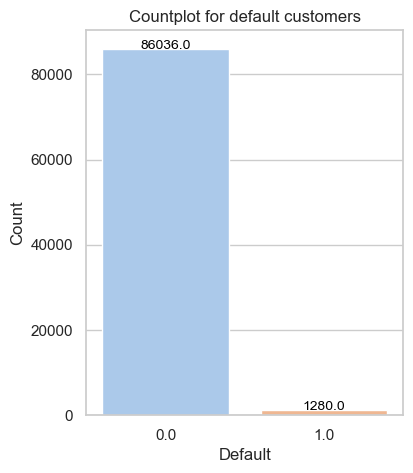

In [5]:
def create_countplot(column, ax, title):
    sns.countplot(x=column, data=df, palette='pastel', ax=ax)
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Countplot for {title} customers')
    ax.tick_params(axis='x', rotation=0)
    # Annotate the count values on top of the bars
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 50),
                    ha='center', va='baseline', fontsize=10, color='black')
# Set the style of seaborn
sns.set(style="whitegrid")
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(9, 5))
# Plot 1: Countplot for 'default' column
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
create_countplot('default', plt.gca(), 'default')

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum().sum()

1501

In [9]:
df.drop_duplicates(inplace= True)
df.duplicated().sum().sum()

0

In [10]:
X = df.drop(columns=['default'])
y = df['default']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60070, 89)
X_test shape: (25745, 89)
y_train shape: (60070,)
y_test shape: (25745,)


In [12]:
print(X_train.head(5))
print(y_train.head(5))
print(X_test.head(5))
print(y_test.head(5))

       acct_amt_added_12_24m  acct_days_in_dc_12_24m  acct_days_in_rem_12_24m  \
32712              14698.125                     0.0                      0.0   
38207                  0.000                     0.0                      0.0   
53146                  0.000                     0.0                      0.0   
80566                  0.000                     0.0                      0.0   
43713                  0.000                     0.0                      0.0   

       acct_days_in_term_12_24m   age  avg_payment_span_0_12m  has_paid  \
32712                       0.0  47.0               16.333333       1.0   
38207                       0.0  28.0               10.000000       1.0   
53146                       0.0  40.0               14.923077       1.0   
80566                       0.0  22.0                6.000000       1.0   
43713                       0.0  43.0               17.000000       1.0   

       max_paid_inv_0_12m  max_paid_inv_0_24m  num_active_inv 

### Using Non-Parametric Models 

#### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [14]:
random_forest_classifier = RandomForestClassifier()

In [15]:
random_forest_classifier.fit(X_train, y_train)
predictions = random_forest_classifier.predict(X_test)
accuracy_rcf = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_rcf * 100))

Accuracy: 98.42%


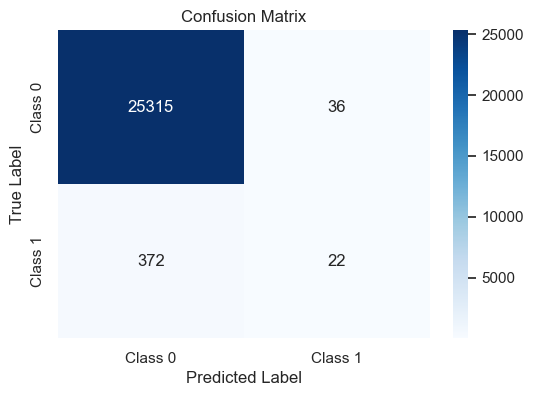

In [18]:
conf_matrix_rcf = confusion_matrix(y_test, predictions)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rcf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show();

In [19]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_rcf = classification_report(y_test, predictions, target_names =target_names, output_dict=True)
class_report_df = pd.DataFrame(class_report_rcf).transpose()
class_report_df

,precision,recall,f1-score,support
Non-Defaulters: 0,0.985518,0.998580,0.992006,25351.000000
Defaulters: 1,0.379310,0.055838,0.097345,394.000000
accuracy,0.984152,0.984152,0.984152,0.984152
macro avg,0.682414,0.527209,0.544676,25745.000000
weighted avg,0.976241,0.984152,0.978314,25745.000000


In [105]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

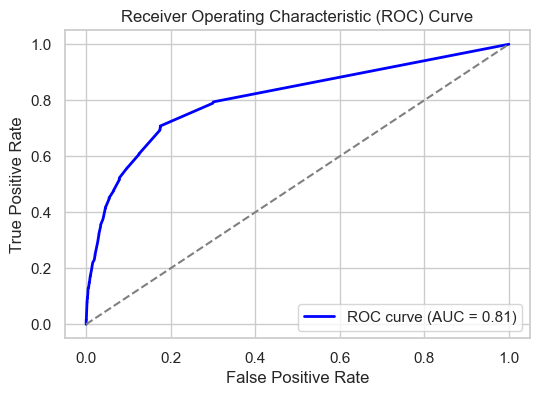

AUC Score: 0.81


In [21]:
# Make predictions
predictions = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc_rcf = roc_auc_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rcf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_rcf))

### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

In [23]:
decision_tree_classifier.fit(X_train, y_train)
predictions = decision_tree_classifier.predict(X_test)
accuracy_dtc = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_dtc * 100))

Accuracy: 97.18%


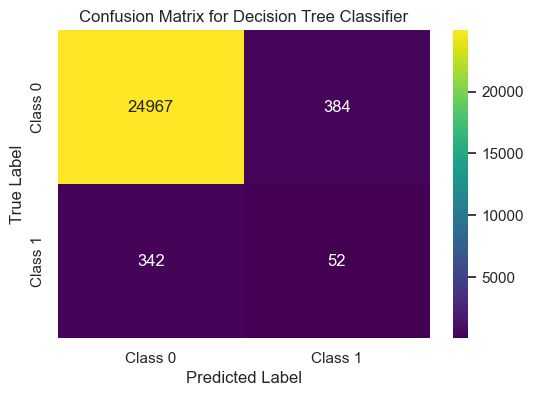

In [24]:
conf_matrix_dtc = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show();

In [25]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_dtc = classification_report(y_test, predictions, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df2 = pd.DataFrame(class_report_dtc).transpose()
class_report_df2

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.986487,0.984853,0.985669,25351.0000
Defaulters: 1,0.119266,0.131980,0.125301,394.0000
accuracy,0.971800,0.971800,0.971800,0.9718
macro avg,0.552877,0.558416,0.555485,25745.0000
weighted avg,0.973215,0.971800,0.972502,25745.0000


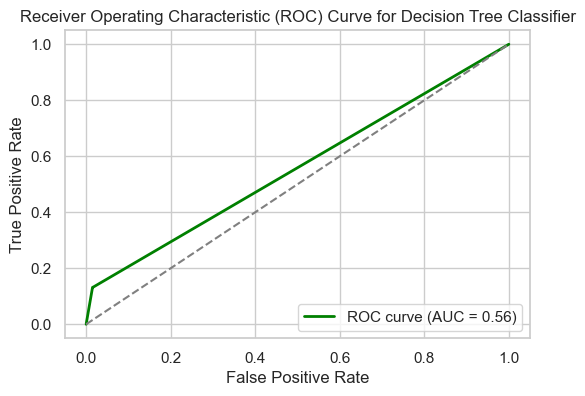

AUC Score: 0.56


In [26]:
predictions_proba = decision_tree_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc_dtc = roc_auc_score(y_test, predictions_proba)
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dtc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show();
print("AUC Score: {:.2f}".format(roc_auc_dtc))

In [27]:
columns = ["Model Name", "Accuracy", "Precision", "Recall", "F1-score", "AUC Score"]
metrics_df = pd.DataFrame(columns=columns)
metrics_df

,Model Name,Accuracy,Precision,Recall,F1-score,AUC Score


In [28]:
precision_rf = class_report_df.loc['Defaulters: 1', 'precision']
recall_rf = class_report_df.loc['Defaulters: 1', 'recall']
f1_score_rf = class_report_df.loc['Defaulters: 1', 'f1-score']
formatted_metrics_rf = {
    "Model Name":"Random Forest Classifier",
    "Accuracy":"{:.2f}%".format(accuracy_rcf * 100),
    "Precision":"{:.2f}".format(precision_rf),
    "Recall": "{:.2f}".format(recall_rf),
    "F1-Score": "{:.2f}".format(f1_score_rf),
    "AUC Score":"{:.2f}".format(roc_auc_rcf)
}
metrics_df_rf = pd.DataFrame([formatted_metrics_rf])
metrics_df_rf

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81


In [29]:
precision_dtc = class_report_df2.loc['Defaulters: 1', 'precision']
recall_dtc = class_report_df2.loc['Defaulters: 1', 'recall']
f1_score_dtc = class_report_df2.loc['Defaulters: 1', 'f1-score']
formatted_metrics_dtc = {
    "Model Name":"Decision Tree Classifier",
    "Accuracy":"{:.2f}%".format(accuracy_dtc * 100),
    "Precision":"{:.2f}".format(precision_dtc),
    "Recall": "{:.2f}".format(recall_dtc),
    "F1-Score": "{:.2f}".format(f1_score_dtc),
    "AUC Score":"{:.2f}".format(roc_auc_dtc)
}
metrics_df_dtc = pd.DataFrame([formatted_metrics_dtc])
concatenated_metrics_df = pd.concat([metrics_df_rf, metrics_df_dtc], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56


### Support Vector Machine

In [30]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))

Accuracy: 98.47%


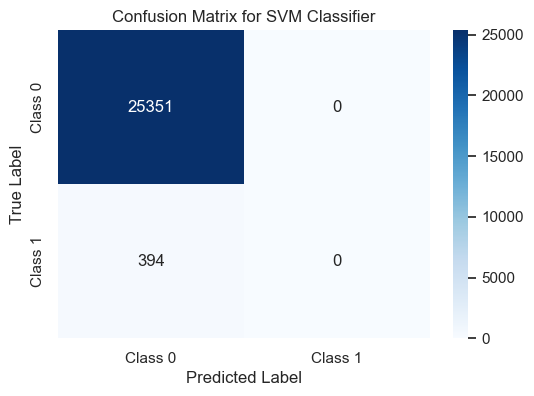

In [31]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show();

In [32]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_svm = classification_report(y_test, predictions, zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df3 = pd.DataFrame(class_report_svm).transpose()
class_report_df3

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.984696,1.000000,0.992289,25351.000000
Defaulters: 1,1.000000,0.000000,0.000000,394.000000
accuracy,0.984696,0.984696,0.984696,0.984696
macro avg,0.992348,0.500000,0.496145,25745.000000
weighted avg,0.984930,0.984696,0.977103,25745.000000


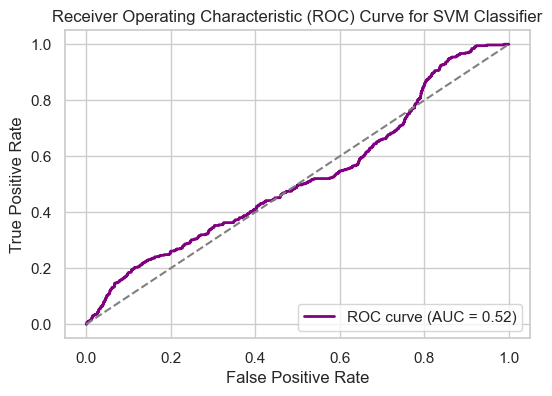

In [33]:
predictions_proba = svm_classifier.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc_svm = roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show();

In [34]:
precision_svm = class_report_df3.loc['Defaulters: 1', 'precision']
recall_svm = class_report_df3.loc['Defaulters: 1', 'recall']
f1_score_svm = class_report_df3.loc['Defaulters: 1', 'f1-score']
formatted_metrics_svm = {
    "Model Name":"Support Vector Machine",
    "Accuracy":"{:.2f}%".format(accuracy_svm * 100),
    "Precision":"{:.2f}".format(precision_svm),
    "Recall": "{:.2f}".format(recall_svm),
    "F1-Score": "{:.2f}".format(f1_score_svm),
    "AUC Score":"{:.2f}".format(roc_auc_svm)
}
metrics_df_svm = pd.DataFrame([formatted_metrics_svm])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_svm], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52


### Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
# Make predictions
predictions = naive_bayes_classifier.predict(X_test)
accuracy_nbc = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_nbc * 100))

Accuracy: 95.98%


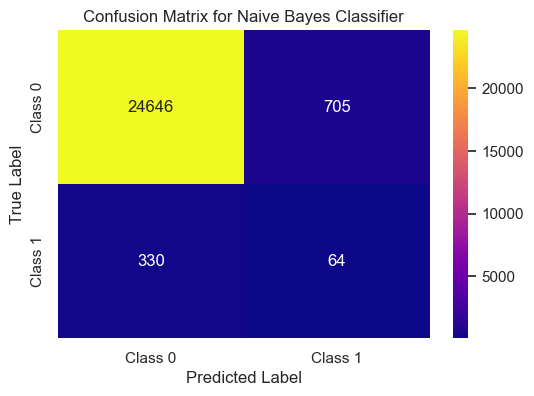

In [36]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show();

In [37]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_nbc = classification_report(y_test, predictions, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df4 = pd.DataFrame(class_report_nbc).transpose()
class_report_df4

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.986787,0.972190,0.979434,25351.000000
Defaulters: 1,0.083225,0.162437,0.110060,394.000000
accuracy,0.959798,0.959798,0.959798,0.959798
macro avg,0.535006,0.567313,0.544747,25745.000000
weighted avg,0.972959,0.959798,0.966130,25745.000000


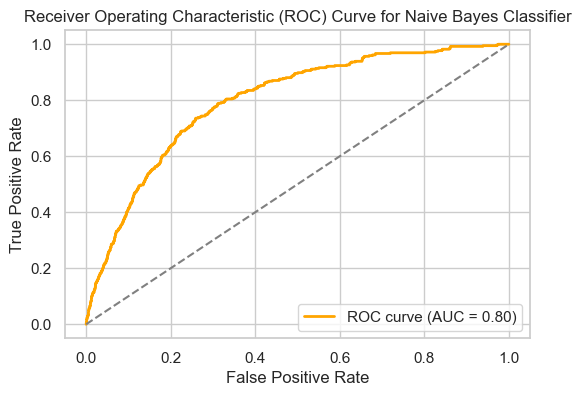

AUC Score: 0.80


In [38]:
predictions_proba = naive_bayes_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc_nbc = roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_nbc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_nbc))

In [39]:
type1_error_percentage = (conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])) * 100
type2_error_percentage = (conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])) * 100
print("Type 1 Error Percentage: {:.2f}%".format(type1_error_percentage))
print("Type 2 Error Percentage: {:.2f}%".format(type2_error_percentage))

Type 1 Error Percentage: 2.78%
Type 2 Error Percentage: 83.76%


### Ensemble Models

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
predictions = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy_bag = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_bag * 100))

Accuracy: 98.41%


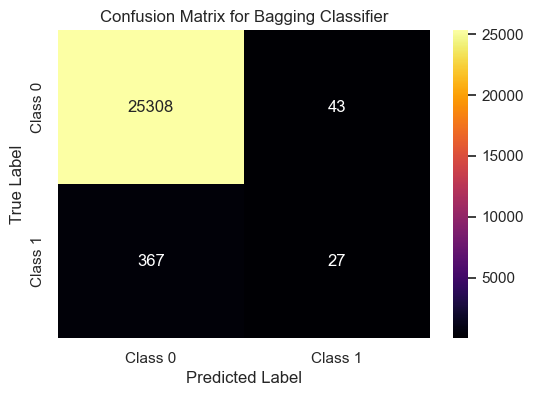

In [43]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show();

In [44]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_bag = classification_report(y_test, predictions, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df5 = pd.DataFrame(class_report_bag).transpose()
class_report_df5

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.985706,0.998304,0.991965,25351.000000
Defaulters: 1,0.385714,0.068528,0.116379,394.000000
accuracy,0.984075,0.984075,0.984075,0.984075
macro avg,0.685710,0.533416,0.554172,25745.000000
weighted avg,0.976524,0.984075,0.978565,25745.000000


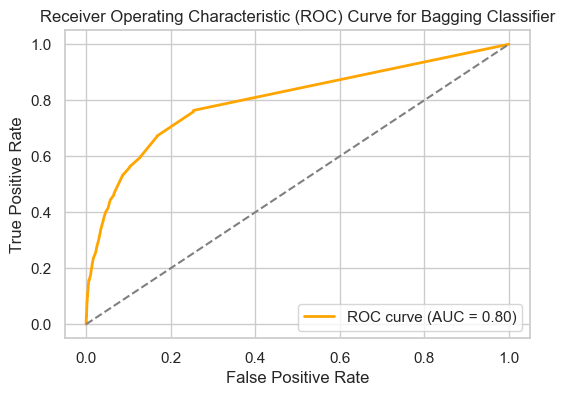

AUC Score: 0.80


In [45]:
predictions_proba = bagging_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc_bag = roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_bag))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Classifier')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_bag))

In [46]:
precision_bag = class_report_df5.loc['Defaulters: 1', 'precision']
recall_bag = class_report_df5.loc['Defaulters: 1', 'recall']
f1_score_bag = class_report_df5.loc['Defaulters: 1', 'f1-score']
formatted_metrics_bag = {
    "Model Name":"Bagging Classifier",
    "Accuracy":"{:.2f}%".format(accuracy_bag * 100),
    "Precision":"{:.2f}".format(precision_bag),
    "Recall": "{:.2f}".format(recall_bag),
    "F1-Score": "{:.2f}".format(f1_score_bag),
    "AUC Score":"{:.2f}".format(roc_auc_bag)
}
metrics_df_bag = pd.DataFrame([formatted_metrics_bag])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_bag], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80


### Boosting Model using Decision Tree Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)  # Shallow decision tree as base learner
adaboost_classifier = AdaBoostClassifier(estimator=base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
predictions = adaboost_classifier.predict(X_test)
# Calculate accuracy
accuracy_boost = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_boost * 100))

Accuracy: 98.45%


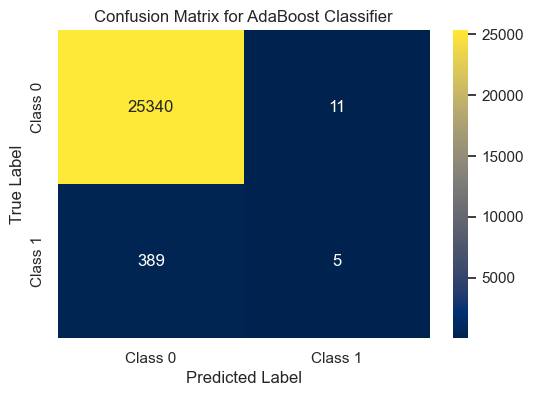

In [48]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show();

In [49]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_boost = classification_report(y_test, predictions, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df6 = pd.DataFrame(class_report_boost).transpose()
class_report_df6

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.984881,0.999566,0.992169,25351.000000
Defaulters: 1,0.312500,0.012690,0.024390,394.000000
accuracy,0.984463,0.984463,0.984463,0.984463
macro avg,0.648690,0.506128,0.508280,25745.000000
weighted avg,0.974591,0.984463,0.977358,25745.000000


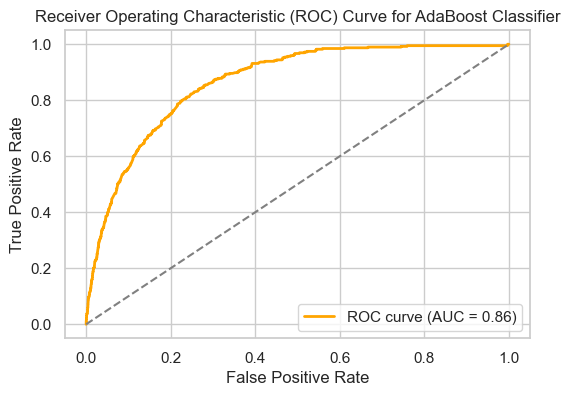

AUC Score: 0.86


In [50]:
predictions_proba = adaboost_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc_boost = roc_auc_score(y_test, predictions_proba)
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_boost))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Classifier')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_boost))

In [51]:
precision_boost = class_report_df6.loc['Defaulters: 1', 'precision']
recall_boost = class_report_df6.loc['Defaulters: 1', 'recall']
f1_score_boost = class_report_df6.loc['Defaulters: 1', 'f1-score']
formatted_metrics_boost = {
    "Model Name":"Ada Boost Classifier",
    "Accuracy":"{:.2f}%".format(accuracy_boost * 100),
    "Precision":"{:.2f}".format(precision_boost),
    "Recall": "{:.2f}".format(recall_boost),
    "F1-Score": "{:.2f}".format(f1_score_boost),
    "AUC Score":"{:.2f}".format(roc_auc_boost)
}
metrics_df_boost = pd.DataFrame([formatted_metrics_boost])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_boost], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86


### Gradient Boosting Technique XGB

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
predictions = gradient_boosting_classifier.predict(X_test)
accuracy_XGB = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_XGB * 100))

Accuracy: 98.45%


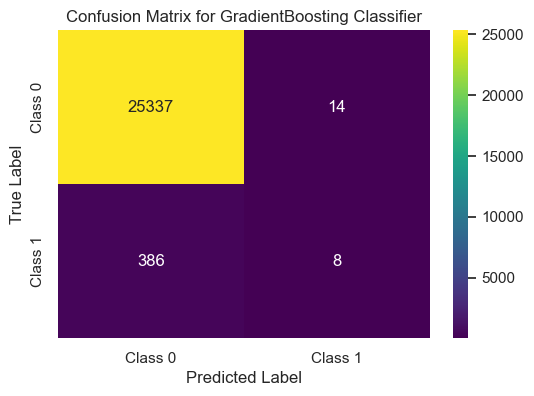

In [57]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GradientBoosting Classifier')
plt.show();

In [58]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_XGB = classification_report(y_test, predictions, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df7 = pd.DataFrame(class_report_XGB).transpose()
class_report_df7

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.984994,0.999448,0.992168,25351.000000
Defaulters: 1,0.363636,0.020305,0.038462,394.000000
accuracy,0.984463,0.984463,0.984463,0.984463
macro avg,0.674315,0.509876,0.515315,25745.000000
weighted avg,0.975485,0.984463,0.977573,25745.000000


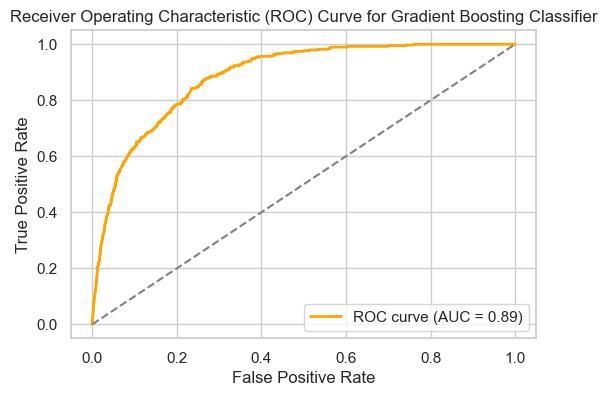

AUC Score: 0.89


In [59]:
predictions_proba = gradient_boosting_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc_XGB = roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_XGB))

In [60]:
precision_XGB = class_report_df7.loc['Defaulters: 1', 'precision']
recall_XGB = class_report_df7.loc['Defaulters: 1', 'recall']
f1_score_XGB = class_report_df7.loc['Defaulters: 1', 'f1-score']
formatted_metrics_XGB = {
    "Model Name":"Gradient Boosting Classifier",
    "Accuracy":"{:.2f}%".format(accuracy_XGB * 100),
    "Precision":"{:.2f}".format(precision_XGB),
    "Recall": "{:.2f}".format(recall_XGB),
    "F1-Score": "{:.2f}".format(f1_score_XGB),
    "AUC Score":"{:.2f}".format(roc_auc_XGB)
}
metrics_df_XGB = pd.DataFrame([formatted_metrics_XGB])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_XGB], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89


### Model Tuning using Hyper parameters

#### Applying GridSearch CV, Randomized search CV and Bayesian Search to check the performances of the model on models which performed well such as Decision Tree Classifier, Naive Bayes Classifier, Bagging Classifer. and then on rest of the models which did not perform well at all.
#### Grid Search CV

#### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [62]:
best_params = {
    'criterion': 'gini',
    'max_depth': 15,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5
}
optimized_dt_classifier = DecisionTreeClassifier(**best_params)
optimized_dt_classifier.fit(X_train, y_train)
predictions = optimized_dt_classifier.predict(X_test)
accuracy_dtc_grid = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_dtc_grid * 100))

Accuracy: 97.95%


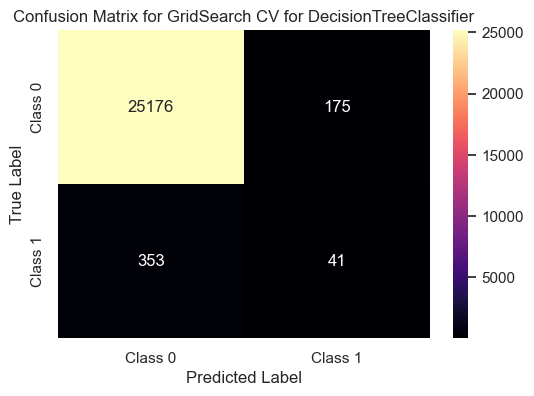

In [63]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GridSearch CV for DecisionTreeClassifier')
plt.show();

In [64]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_dtc_grid = classification_report(y_test, predictions,zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df8 = pd.DataFrame(class_report_dtc_grid).transpose()
class_report_df8

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.986173,0.993097,0.989623,25351.000000
Defaulters: 1,0.189815,0.104061,0.134426,394.000000
accuracy,0.979491,0.979491,0.979491,0.979491
macro avg,0.587994,0.548579,0.562024,25745.000000
weighted avg,0.973985,0.979491,0.976535,25745.000000


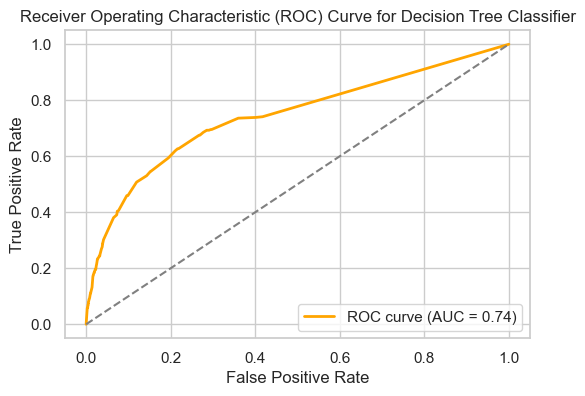

AUC Score: 0.74


In [65]:
best_dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
best_dt_classifier.fit(X_train, y_train)
predictions_proba = best_dt_classifier.predict_proba(X_test)[:, 1]
roc_auc_DT = roc_auc_score(y_test, predictions_proba)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_DT))

In [66]:
precision_dtc_grid = class_report_df8.loc['Defaulters: 1', 'precision']
recall_dtc_grid = class_report_df8.loc['Defaulters: 1', 'recall']
f1_score_dtc_grid = class_report_df8.loc['Defaulters: 1', 'f1-score']
formatted_metrics_dtc_grid = {
    "Model Name":"GridSearchCV for Decision Tree Classifier",
    "Accuracy":"{:.2f}%".format(accuracy_dtc_grid * 100),
    "Precision":"{:.2f}".format(precision_dtc_grid),
    "Recall": "{:.2f}".format(recall_dtc_grid),
    "F1-Score": "{:.2f}".format(f1_score_dtc_grid),
    "AUC Score":"{:.2f}".format(roc_auc_DT)
}
metrics_df_dtc_grid = pd.DataFrame([formatted_metrics_dtc_grid])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_dtc_grid], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74


### Naive Bayes Classifier
#### Grid Search CV Naive Bayes Classifier Multi nomial NB

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
nb_classifier = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0] 
}
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 0.1}


In [68]:
best_nb_classifier = grid_search.best_estimator_
predictions = best_nb_classifier.predict(X_test)
accuracy_nb_grid_2 = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy_nb_grid_2)

Accuracy Score: 0.6126626529423189


Confusion Matrix:


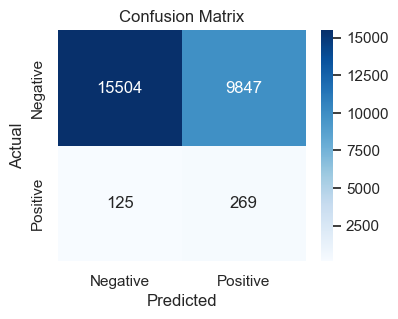

In [69]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [70]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_nb_grid_2 = classification_report(y_test, predictions,zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df10 = pd.DataFrame(class_report_nb_grid_2).transpose()
class_report_df10

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.992002,0.611574,0.756662,25351.000000
Defaulters: 1,0.026592,0.682741,0.051189,394.000000
accuracy,0.612663,0.612663,0.612663,0.612663
macro avg,0.509297,0.647157,0.403926,25745.000000
weighted avg,0.977227,0.612663,0.745865,25745.000000


AUC Score: 0.6458230504628718


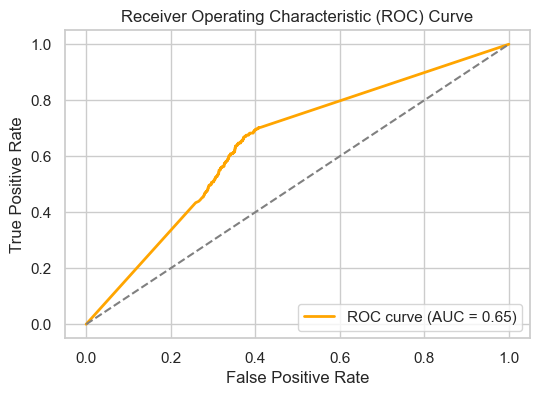

In [71]:
predictions_proba = best_nb_classifier.predict_proba(X_test)[:, 1]
roc_auc_nb_grid_2 = roc_auc_score(y_test, predictions_proba)
print("AUC Score:", roc_auc_nb_grid_2)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_nb_grid_2))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [72]:
precision_nb_grid_2 = class_report_df10.loc['Defaulters: 1', 'precision']
recall_nb_grid_2 = class_report_df10.loc['Defaulters: 1', 'recall']
f1_score_nb_grid_2 = class_report_df10.loc['Defaulters: 1', 'f1-score']
accuracy_nb_grid_2 = accuracy_score(y_test, predictions)
roc_auc__nb_grid_2 = roc_auc_score(y_test, predictions_proba)
formatted_metrics_nb_grid_2 = {
    "Model Name": "GridSearchCV for Naive Bayes Classifier MultiNomial NB",
    "Accuracy": "{:.2f}%".format(accuracy_nb_grid_2 * 100),
    "Precision": "{:.2f}".format(precision_nb_grid_2),
    "Recall": "{:.2f}".format(recall_nb_grid_2),
    "F1-Score": "{:.2f}".format(f1_score_nb_grid_2),
    "AUC Score": "{:.2f}".format(roc_auc_nb_grid_2)
}
metrics_df_nb_grid_2 = pd.DataFrame([formatted_metrics_nb_grid_2])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_nb_grid_2], ignore_index=True)
concatenated_metrics_df = concatenated_metrics_df.drop_duplicates()
pd.set_option('display.max_colwidth', None)
concatenated_metrics_df.reset_index(drop=True, inplace= True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65


### Grid Search CV Naive Bayes Classifier Bernoulli NB

In [73]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
nb_classifier = BernoulliNB()
param_grid = {
    'alpha': [1e-3, 1e-2, 0.1, 1, 10],     # Smoothing parameter
    'binarize': [None, 0.1, 0.5, 1.0]     # Threshold for binarizing features (or None for no binarization)
}
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 0.001, 'binarize': 0.1}


In [74]:
from sklearn.metrics import accuracy_score
best_nb_classifier = grid_search.best_estimator_
predictions = best_nb_classifier.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy_bernoulli)

Accuracy Score: 0.9228199650417557


Confusion Matrix:


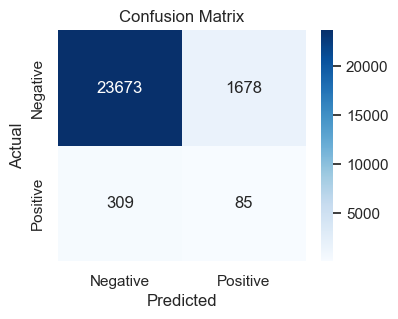

In [75]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_bernoulli = classification_report(y_test, predictions,zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df11 = pd.DataFrame(class_report_bernoulli).transpose()
class_report_df11

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.987115,0.933809,0.959723,25351.00000
Defaulters: 1,0.048213,0.215736,0.078813,394.00000
accuracy,0.922820,0.922820,0.922820,0.92282
macro avg,0.517664,0.574773,0.519268,25745.00000
weighted avg,0.972746,0.922820,0.946241,25745.00000


AUC Score: 0.7502602546540982


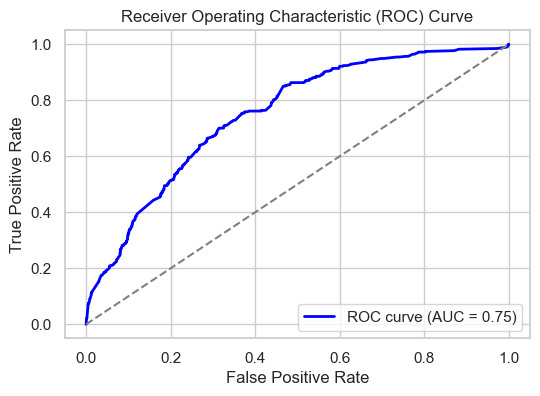

In [77]:
predictions_proba = best_nb_classifier.predict_proba(X_test)[:, 1]
roc_auc_nb_bernoulli = roc_auc_score(y_test, predictions_proba)
print("AUC Score:", roc_auc_nb_bernoulli)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_nb_bernoulli))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [78]:
precision_nb_bernoulli = class_report_df11.loc['Defaulters: 1', 'precision']
recall_nb_bernoulli = class_report_df11.loc['Defaulters: 1', 'recall']
f1_score_nb_bernoulli = class_report_df11.loc['Defaulters: 1', 'f1-score']
accuracy_nb_bernoulli = accuracy_score(y_test, predictions)
roc_auc_nb_bernoulli = roc_auc_score(y_test, predictions_proba)
formatted_metrics_nb_grid_bernoulli = {
    "Model Name": "GridSearchCV for Naive Bayes Classifier Bernoulli NB",
    "Accuracy": "{:.2f}%".format(accuracy_nb_bernoulli * 100),
    "Precision": "{:.2f}".format(precision_nb_bernoulli),
    "Recall": "{:.2f}".format(recall_nb_bernoulli),
    "F1-Score": "{:.2f}".format(f1_score_nb_bernoulli),
    "AUC Score": "{:.2f}".format(roc_auc_nb_bernoulli)
}
metrics_df_nb_bernoulli = pd.DataFrame([formatted_metrics_nb_grid_bernoulli])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_nb_bernoulli], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65
9,GridSearchCV for Naive Bayes Classifier Bernoulli NB,92.28%,0.05,0.22,0.08,0.75


### Randomised Search CV using Random Forest Classifier

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param_dist = {
    'n_estimators': np.arange(10, 300),
    'max_features': ['auto', 'sqrt'],
    'max_depth': np.arange(1, 30),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}
rf_clf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.98546696        nan 0.98541701        nan        nan        nan
        nan 0.98541701        nan        nan 0.98541701 0.98533378
 0.98545031 0.98541701        nan 0.98541701        nan        nan
        nan 0.98541701]
  warnings.warn(


Best Parameters:  {'n_estimators': 40, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}
Best Accuracy: 0.99


In [81]:
accuracy = random_search.score(X_test, y_test)
print("Test Accuracy: {:.2f}".format(accuracy))

Test Accuracy: 0.99


Confusion Matrix:


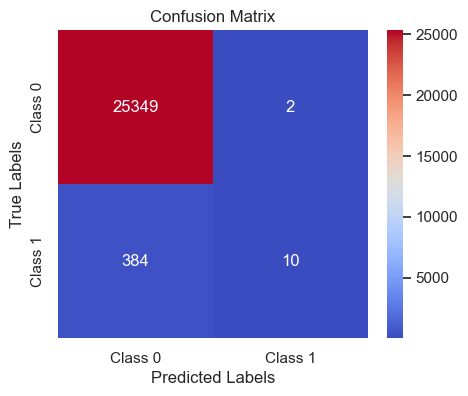

In [82]:
predictions = random_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [83]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_Random_rfc = classification_report(y_test, predictions,zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df12 = pd.DataFrame(class_report_Random_rfc).transpose()
class_report_df12

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.985078,0.999921,0.992444,25351.000000
Defaulters: 1,0.833333,0.025381,0.049261,394.000000
accuracy,0.985007,0.985007,0.985007,0.985007
macro avg,0.909205,0.512651,0.520852,25745.000000
weighted avg,0.982755,0.985007,0.978009,25745.000000


AUC Score: 0.8849560795867643


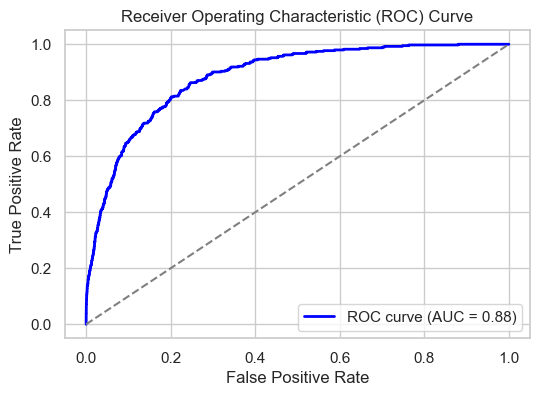

In [84]:
predictions_proba = random_search.predict_proba(X_test)[:, 1]
roc_auc_random_rfc = roc_auc_score(y_test, predictions_proba)
print("AUC Score:", roc_auc_random_rfc)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_random_rfc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [85]:
precision_rand_rfc = class_report_df12.loc['Defaulters: 1', 'precision']
recall_rand_rfc = class_report_df12.loc['Defaulters: 1', 'recall']
f1_score_rand_rfc = class_report_df12.loc['Defaulters: 1', 'f1-score']
accuracy_rand_rfc = accuracy_score(y_test, predictions)
roc_auc_rand_rfc = roc_auc_score(y_test, predictions_proba)
formatted_metrics_rand_rfc = {
    "Model Name": "RandomisedSearchCV for RandomForestClassification ",
    "Accuracy": "{:.2f}%".format(accuracy_rand_rfc * 100),
    "Precision": "{:.2f}".format(precision_rand_rfc),
    "Recall": "{:.2f}".format(recall_rand_rfc),
    "F1-Score": "{:.2f}".format(f1_score_rand_rfc),
    "AUC Score": "{:.2f}".format(roc_auc_rand_rfc)
}
metrics_df_rand_rfc = pd.DataFrame([formatted_metrics_rand_rfc])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_rand_rfc], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65
9,GridSearchCV for Naive Bayes Classifier Bernoulli NB,92.28%,0.05,0.22,0.08,0.75


### Randomised Search CV using Decision Tree Classifier

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
param_dist = {
    'criterion': ['gini', 'entropy'],                    
    'splitter': ['best', 'random'],                      
    'max_depth': np.arange(1, 20),                         
    'min_samples_split': np.arange(2, 11),                 
    'min_samples_leaf': np.arange(1, 11),                  
    'max_features': ['auto', 'sqrt', 'log2', None]         
}
dt_clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator=dt_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

Best Parameters:  {'splitter': 'random', 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 3, 'criterion': 'entropy'}
Best Accuracy: 0.99


C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.98187115 0.98541701        nan 0.98541701 0.98513401 0.98508407
 0.98523389 0.98538372 0.98541701 0.98541701        nan 0.98435159
        nan 0.98313634 0.98541701 0.98478442 0.98541701        nan
 0.98541701 0.98541701 0.98541701 0.98541701        nan 0.98403529
 0.98541701        nan 0.98541701 0.98423506        nan 0.98523389
 0.98528384 0.98541701 0.98541701 0.98540037 0.98541701 0.98530048
 0.98541701 0.98528384        nan        nan 0.98541701 0.98533378
 0.98541701 0.98525054 0.98215415 0.98530048 0.98540037 0.984568
        nan        nan]
  warnings.warn(


In [87]:
accuracy = random_search.score(X_test, y_test)
print("Test Accuracy: {:.2f}".format(accuracy))

Test Accuracy: 0.98


Confusion Matrix:


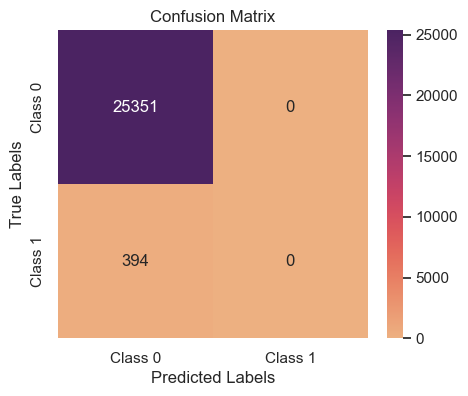

In [88]:
predictions = random_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='flare', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [89]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_Random_dtc = classification_report(y_test, predictions, zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df13 = pd.DataFrame(class_report_Random_dtc).transpose()
class_report_df13

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.984696,1.000000,0.992289,25351.000000
Defaulters: 1,1.000000,0.000000,0.000000,394.000000
accuracy,0.984696,0.984696,0.984696,0.984696
macro avg,0.992348,0.500000,0.496145,25745.000000
weighted avg,0.984930,0.984696,0.977103,25745.000000


AUC Score: 0.7667578667588281


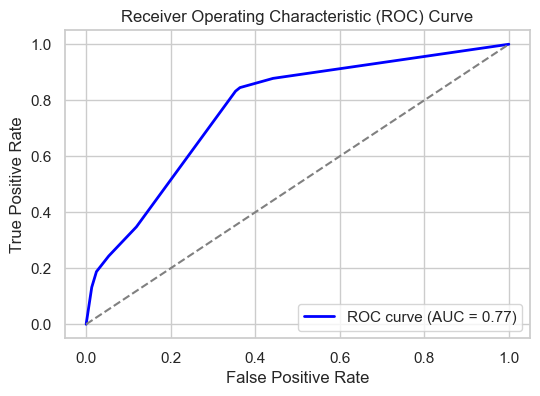

In [90]:
predictions_proba = random_search.predict_proba(X_test)[:, 1]
roc_auc_random_rfc = roc_auc_score(y_test, predictions_proba)
print("AUC Score:", roc_auc_random_rfc)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_random_rfc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [91]:
precision_rand_dtc = class_report_df12.loc['Defaulters: 1', 'precision']
recall_rand_dtc = class_report_df12.loc['Defaulters: 1', 'recall']
f1_score_rand_dtc = class_report_df12.loc['Defaulters: 1', 'f1-score']
accuracy_rand_dtc = accuracy_score(y_test, predictions)
roc_auc_rand_dtc = roc_auc_score(y_test, predictions_proba)
formatted_metrics_rand_dtc = {
    "Model Name": "RandomisedSearchCV for Decision Tree Classifier ",
    "Accuracy": "{:.2f}%".format(accuracy_rand_dtc * 100),
    "Precision": "{:.2f}".format(precision_rand_dtc),
    "Recall": "{:.2f}".format(recall_rand_dtc),
    "F1-Score": "{:.2f}".format(f1_score_rand_dtc),
    "AUC Score": "{:.2f}".format(roc_auc_rand_dtc)
}
metrics_df_rand_dtc = pd.DataFrame([formatted_metrics_rand_dtc])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_rand_dtc], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65
9,GridSearchCV for Naive Bayes Classifier Bernoulli NB,92.28%,0.05,0.22,0.08,0.75


### Randomised Search CV for Naive Bayes MultinomialNB and BernoulliNB

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
param_dist_bernoulli = {
    'alpha': np.logspace(-2, 2, num=100)
}
param_dist_multinomial = {
    'alpha': np.logspace(-2, 2, num=100)
}
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
random_search_bernoulli = RandomizedSearchCV(estimator=bernoulli_nb, param_distributions=param_dist_bernoulli, n_iter=100, cv=5, random_state=42)
random_search_multinomial = RandomizedSearchCV(estimator=multinomial_nb, param_distributions=param_dist_multinomial, n_iter=100, cv=5, random_state=42)
random_search_bernoulli.fit(X_train, y_train)
random_search_multinomial.fit(X_train, y_train)
print("Bernoulli Naive Bayes - Best Parameters: ", random_search_bernoulli.best_params_)
print("Bernoulli Naive Bayes - Best Accuracy: {:.2f}".format(random_search_bernoulli.best_score_))
print("Multinomial Naive Bayes - Best Parameters: ", random_search_multinomial.best_params_)
print("Multinomial Naive Bayes - Best Accuracy: {:.2f}".format(random_search_multinomial.best_score_))

Bernoulli Naive Bayes - Best Parameters:  {'alpha': 83.02175681319753}
Bernoulli Naive Bayes - Best Accuracy: 0.99
Multinomial Naive Bayes - Best Parameters:  {'alpha': 100.0}
Multinomial Naive Bayes - Best Accuracy: 0.62


In [93]:
accuracy_bernoulli = random_search_bernoulli.score(X_test, y_test)
print("Bernoulli Naive Bayes Test Accuracy: {:.2f}".format(accuracy_bernoulli))
accuracy_multinomial = random_search_multinomial.score(X_test, y_test)
print("Multinomial Naive Bayes Test Accuracy: {:.2f}".format(accuracy_multinomial))

Bernoulli Naive Bayes Test Accuracy: 0.98
Multinomial Naive Bayes Test Accuracy: 0.61


Confusion Matrix for Bernoulli Naive Bayes:

Confusion Matrix for Multinomial Naive Bayes:


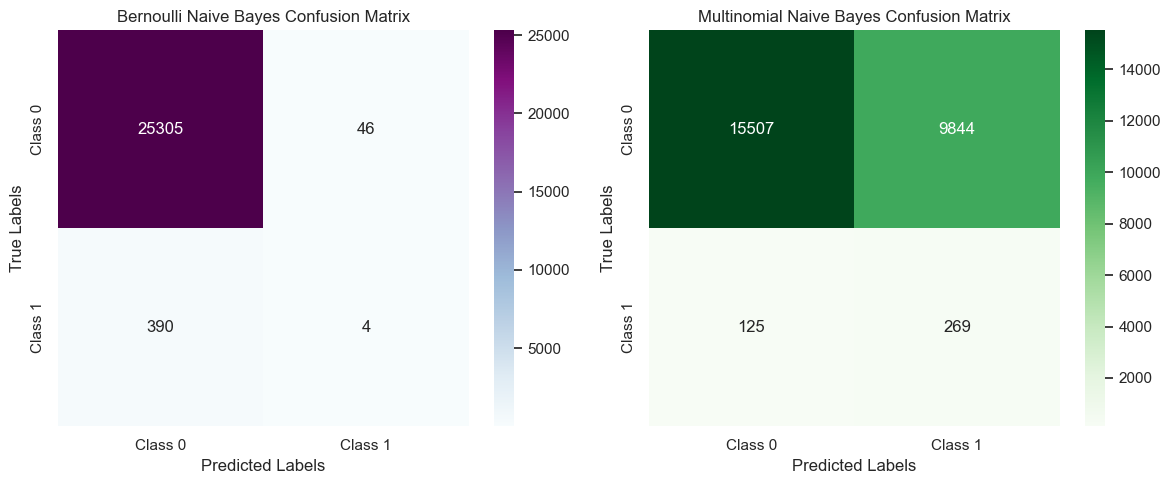

In [94]:
predictions_bernoulli = random_search_bernoulli.predict(X_test)
conf_matrix_bernoulli = confusion_matrix(y_test, predictions_bernoulli)
predictions_multinomial = random_search_multinomial.predict(X_test)
conf_matrix_multinomial = confusion_matrix(y_test, predictions_multinomial)
print("Confusion Matrix for Bernoulli Naive Bayes:")
print("\nConfusion Matrix for Multinomial Naive Bayes:")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(conf_matrix_bernoulli, annot=True, fmt='d', cmap='BuPu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Bernoulli Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[1])
axes[1].set_title('Multinomial Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

In [102]:
predictions_bernoulli = random_search_bernoulli.predict(X_test)
predictions_multinomial = random_search_multinomial.predict(X_test)
target_names = ['Non-Defaulters', 'Defaulters'] 

class_report_bernoulli = classification_report(y_test, predictions_bernoulli, target_names=target_names, output_dict= True)
class_report_multinomial = classification_report(y_test, predictions_multinomial, target_names=target_names, output_dict= True)

class_report_bernoulli= pd.DataFrame(class_report_bernoulli).transpose()
class_report_multinomial= pd.DataFrame(class_report_multinomial).transpose()

print("Classification Report for Bernoulli Naive Bayes:\n")
class_report_bernoulli

Classification Report for Bernoulli Naive Bayes:



,precision,recall,f1-score,support
Non-Defaulters,0.984822,0.998185,0.991459,25351.000000
Defaulters,0.080000,0.010152,0.018018,394.000000
accuracy,0.983065,0.983065,0.983065,0.983065
macro avg,0.532411,0.504169,0.504738,25745.000000
weighted avg,0.970975,0.983065,0.976561,25745.000000


In [103]:
print("\nClassification Report for Multinomial Naive Bayes:\n")
class_report_multinomial


Classification Report for Multinomial Naive Bayes:



,precision,recall,f1-score,support
Non-Defaulters,0.992004,0.611692,0.756753,25351.000000
Defaulters,0.026599,0.682741,0.051204,394.000000
accuracy,0.612779,0.612779,0.612779,0.612779
macro avg,0.509302,0.647216,0.403978,25745.000000
weighted avg,0.977229,0.612779,0.745955,25745.000000


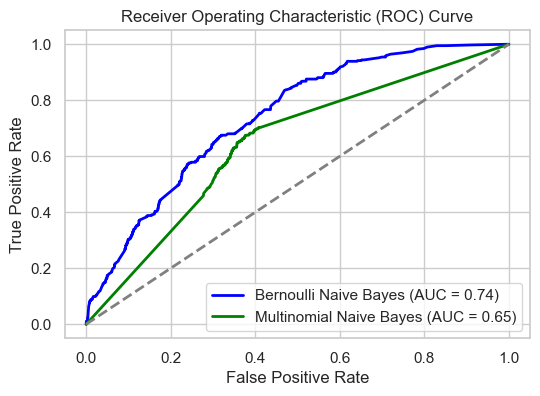

Bernoulli Naive Bayes AUC Score: 0.74
Multinomial Naive Bayes AUC Score: 0.65


In [108]:
from sklearn.metrics import roc_curve, auc
y_scores_bernoulli = random_search_bernoulli.predict_proba(X_test)[:, 1]
fpr_bernoulli, tpr_bernoulli, _ = roc_curve(y_test, y_scores_bernoulli)
roc_auc_bernoulli = auc(fpr_bernoulli, tpr_bernoulli)
y_scores_multinomial = random_search_multinomial.predict_proba(X_test)[:, 1]
fpr_multinomial, tpr_multinomial, _ = roc_curve(y_test, y_scores_multinomial)
roc_auc_multinomial = auc(fpr_multinomial, tpr_multinomial)
plt.figure(figsize=(6, 4))
plt.plot(fpr_bernoulli, tpr_bernoulli, color='blue', lw=2, label='Bernoulli Naive Bayes (AUC = {:.2f})'.format(roc_auc_bernoulli))
plt.plot(fpr_multinomial, tpr_multinomial, color='green', lw=2, label='Multinomial Naive Bayes (AUC = {:.2f})'.format(roc_auc_multinomial))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Bernoulli Naive Bayes AUC Score: {:.2f}".format(roc_auc_bernoulli))
print("Multinomial Naive Bayes AUC Score: {:.2f}".format(roc_auc_multinomial))

In [109]:
precision_bernoulli = class_report_bernoulli.loc['Defaulters', 'precision']
recall_bernoulli = class_report_bernoulli.loc['Defaulters', 'recall']
f1_score_bernoulli = class_report_bernoulli.loc['Defaulters', 'f1-score']
accuracy_bernoulli = accuracy_score(y_test, predictions)
roc_auc_bernoulli = roc_auc_score(y_test, predictions_proba)
formatted_metrics_bernoulli = {
    "Model Name": "RandomisedSearchCV for NaiveBayes BernoulliClassifier ",
    "Accuracy": "{:.2f}%".format(accuracy_bernoulli * 100),
    "Precision": "{:.2f}".format(precision_bernoulli),
    "Recall": "{:.2f}".format(recall_bernoulli),
    "F1-Score": "{:.2f}".format(f1_score_bernoulli),
    "AUC Score": "{:.2f}".format(roc_auc_bernoulli)
}
metrics_df_bernoulli = pd.DataFrame([formatted_metrics_bernoulli])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_bernoulli], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65
9,GridSearchCV for Naive Bayes Classifier Bernoulli NB,92.28%,0.05,0.22,0.08,0.75


In [110]:
precision_multinomial = class_report_multinomial.loc['Defaulters', 'precision']
recall_multinomial = class_report_multinomial.loc['Defaulters', 'recall']
f1_score_multinomial = class_report_multinomial.loc['Defaulters', 'f1-score']
accuracy_multinomial = accuracy_score(y_test, predictions)
roc_auc_multinomial = roc_auc_score(y_test, predictions_proba)
formatted_metrics_multinomial = {
    "Model Name": "RandomisedSearchCV for NaiveBayes MutliNomial Classifier ",
    "Accuracy": "{:.2f}%".format(accuracy_multinomial * 100),
    "Precision": "{:.2f}".format(precision_multinomial),
    "Recall": "{:.2f}".format(recall_multinomial),
    "F1-Score": "{:.2f}".format(f1_score_multinomial),
    "AUC Score": "{:.2f}".format(roc_auc_multinomial)
}
metrics_df_multinomial = pd.DataFrame([formatted_metrics_multinomial])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_multinomial], ignore_index=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65
9,GridSearchCV for Naive Bayes Classifier Bernoulli NB,92.28%,0.05,0.22,0.08,0.75


### RandomisedSearchCV for Bagging Classifier using Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 100),         # Number of trees in the forest
    'max_depth': randint(1, 20),               # Maximum depth of the tree
    'min_samples_split': randint(2, 20),       # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),        # Minimum number of samples required to be at a leaf node
    'max_features': np.arange(0.1, 1.1, 0.1)   # Proportion of features to consider for the best split
}
random_forest_clf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest_clf, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best Parameters: ", random_search_rf.best_params_)
print("Best Accuracy: {:.2f}".format(random_search_rf.best_score_))

Best Parameters:  {'max_depth': 12, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 85}
Best Accuracy: 0.99


In [112]:
test_accuracy = random_search_rf.score(X_test, y_test)
print("Test Accuracy: {:.2f}".format(test_accuracy))

Test Accuracy: 0.99


Confusion Matrix:



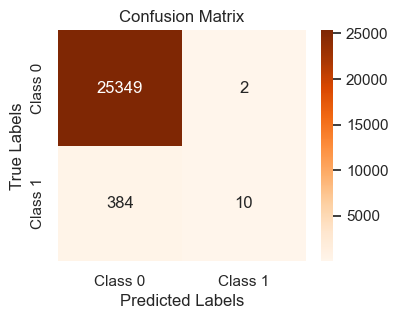

In [113]:
predictions = random_search_rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n")
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [114]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_Random_bag = classification_report(y_test, predictions, zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df15 = pd.DataFrame(class_report_Random_bag).transpose()
class_report_df15

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.985078,0.999921,0.992444,25351.000000
Defaulters: 1,0.833333,0.025381,0.049261,394.000000
accuracy,0.985007,0.985007,0.985007,0.985007
macro avg,0.909205,0.512651,0.520852,25745.000000
weighted avg,0.982755,0.985007,0.978009,25745.000000


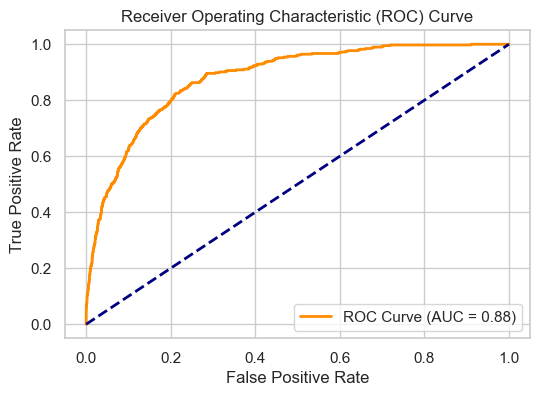

AUC Score: 0.88


In [115]:
y_scores = random_search_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc_randbag_rf = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_randbag_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_randbag_rf))

In [116]:
precision_randbagrfc = class_report_df15.loc['Defaulters: 1', 'precision']
recall_randbagrfc = class_report_df15.loc['Defaulters: 1', 'recall']
f1_score_randbagrfc = class_report_df15.loc['Defaulters: 1', 'f1-score']
accuracy_randbagrfc = accuracy_score(y_test, predictions)
roc_auc_randbagrfc = roc_auc_score(y_test, predictions_proba)
formatted_metrics_randbagrfc = {
    "Model Name": "RandomisedSearchCV for Bagging Classifier using Random Forest Classifier",
    "Accuracy": "{:.2f}%".format(accuracy_randbagrfc * 100),
    "Precision": "{:.2f}".format(precision_randbagrfc),
    "Recall": "{:.2f}".format(recall_randbagrfc),
    "F1-Score": "{:.2f}".format(f1_score_randbagrfc),
    "AUC Score": "{:.2f}".format(roc_auc_randbagrfc)
}
metrics_df_randbagrfc = pd.DataFrame([formatted_metrics_randbagrfc])
concatenated_metrics_df = pd.concat([concatenated_metrics_df, metrics_df_randbagrfc], ignore_index=True)
concatenated_metrics_df = concatenated_metrics_df.drop_duplicates()

In [117]:
concatenated_metrics_df.reset_index(drop=True, inplace=True)
concatenated_metrics_df

,Model Name,Accuracy,Precision,Recall,F1-Score,AUC Score
0,Random Forest Classifier,98.42%,0.38,0.06,0.10,0.81
1,Decision Tree Classifier,97.18%,0.12,0.13,0.13,0.56
2,Support Vector Machine,98.47%,1.00,0.00,0.00,0.52
3,Naive Bayes Classifier,95.98%,0.08,0.16,0.11,0.80
4,Bagging Classifier,98.41%,0.39,0.07,0.12,0.80
5,Ada Boost Classifier,98.45%,0.31,0.01,0.02,0.86
6,Gradient Boosting Classifier,98.45%,0.36,0.02,0.04,0.89
7,GridSearchCV for Decision Tree Classifier,97.95%,0.19,0.10,0.13,0.74
8,GridSearchCV for Naive Bayes Classifier MultiNomial NB,61.27%,0.03,0.68,0.05,0.65
9,GridSearchCV for Naive Bayes Classifier Bernoulli NB,92.28%,0.05,0.22,0.08,0.75


Choosing Decision Tree Classifier with GridSearch CV as the Optimum Model for this Dataset. 

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'max_depth': [15],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': [None],
    'criterion': ['entropy']
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [119]:
best_params = {
    'criterion': 'gini',
    'max_depth': 15,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5
}
optimized_dt_classifier = DecisionTreeClassifier(**best_params)
optimized_dt_classifier.fit(X_train, y_train)
predictions = optimized_dt_classifier.predict(X_test)
accuracy_dtc_grid = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_dtc_grid * 100))

Accuracy: 97.95%


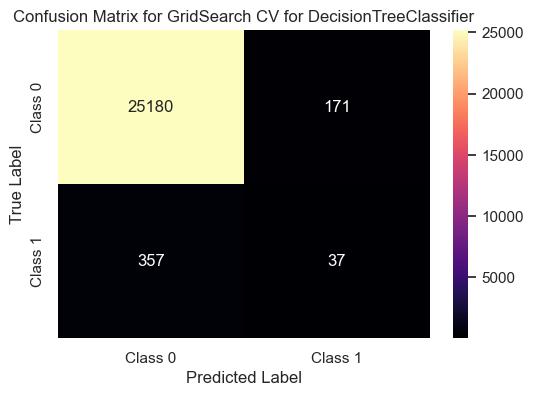

In [120]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GridSearch CV for DecisionTreeClassifier')
plt.show();

In [121]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_dtc_grid = classification_report(y_test, predictions,zero_division=1, target_names= target_names, output_dict= True)
print("Classification Report:\n")
class_report_df8 = pd.DataFrame(class_report_dtc_grid).transpose()
class_report_df8

Classification Report:



,precision,recall,f1-score,support
Non-Defaulters: 0,0.986020,0.993255,0.989624,25351.000000
Defaulters: 1,0.177885,0.093909,0.122924,394.000000
accuracy,0.979491,0.979491,0.979491,0.979491
macro avg,0.581952,0.543582,0.556274,25745.000000
weighted avg,0.973653,0.979491,0.976360,25745.000000


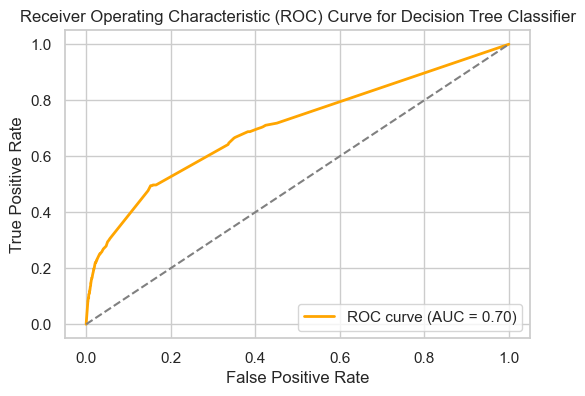

AUC Score: 0.70


In [122]:
best_dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
best_dt_classifier.fit(X_train, y_train)
predictions_proba = best_dt_classifier.predict_proba(X_test)[:, 1]
roc_auc_DT = roc_auc_score(y_test, predictions_proba)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()
print("AUC Score: {:.2f}".format(roc_auc_DT))

Top 10 Feature Importances:


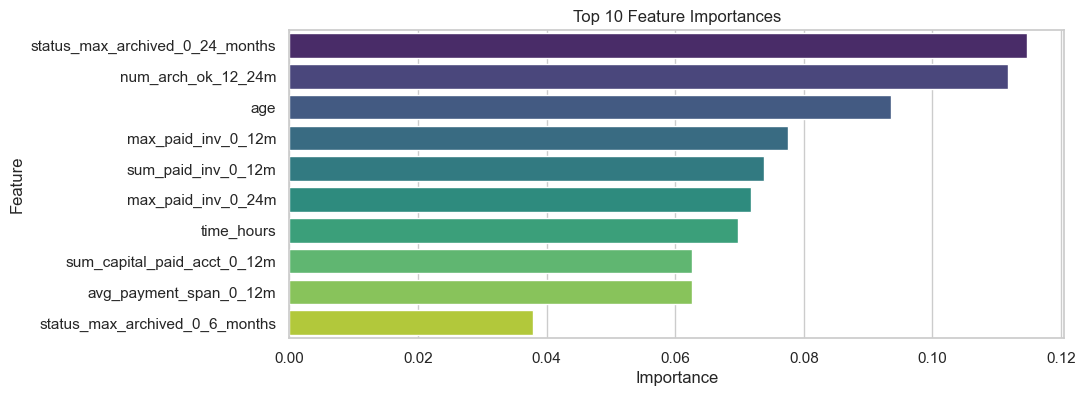

In [124]:
feature_importances = best_dt_classifier.feature_importances_
feature_importance_dtc_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by Importance in descending order and select top 10 features
top_10_features = feature_importance_dtc_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features
print("Top 10 Feature Importances:")
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

Feature Importances:


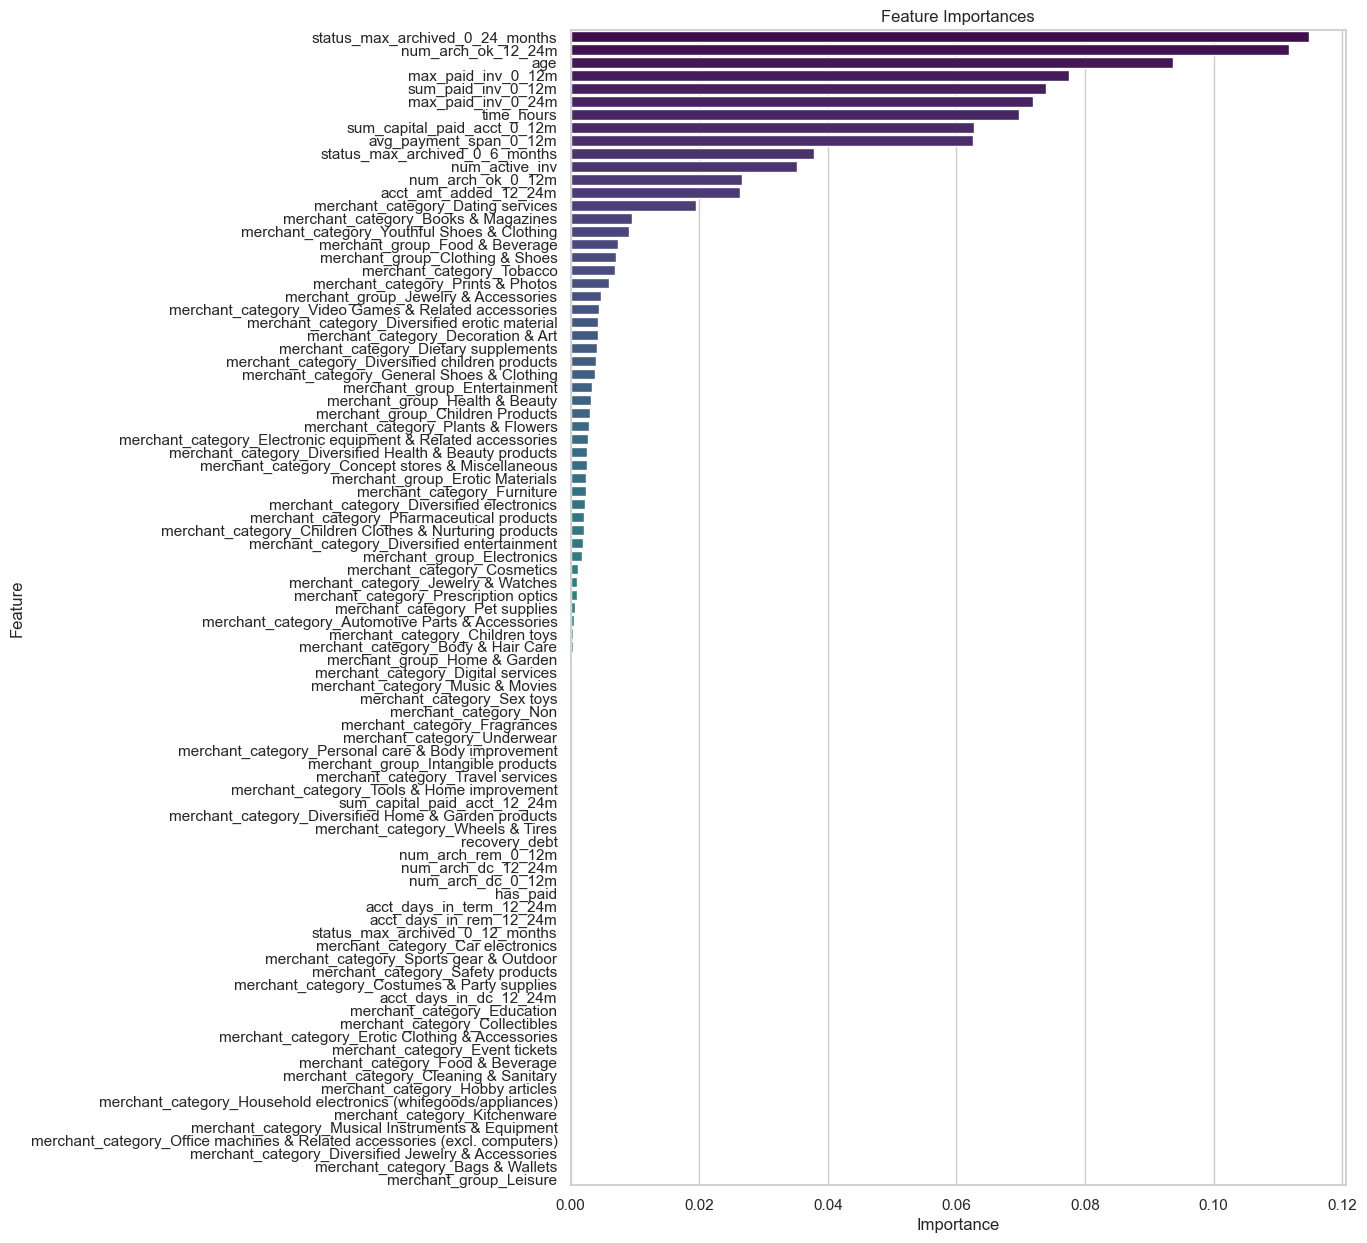

In [125]:
feature_importances = best_dt_classifier.feature_importances_
feature_importance_dtc_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})
feature_importance_dtc_df = feature_importance_dtc_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dtc_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show();

In [126]:
feature_importance_dtc_df
top_10_features = feature_importance_dtc_df.sort_values(by='Importance', ascending=False).head(10)
top_10_features

,Feature,Importance
17,status_max_archived_0_24_months,0.114770
13,num_arch_ok_12_24m,0.111697
4,age,0.093613
7,max_paid_inv_0_12m,0.077550
21,sum_paid_inv_0_12m,0.073852
8,max_paid_inv_0_24m,0.071848
22,time_hours,0.069702
19,sum_capital_paid_acct_0_12m,0.062667
5,avg_payment_span_0_12m,0.062576
15,status_max_archived_0_6_months,0.037884
